### INFO6105 Data Science Methods and Tools 
### CRN:18687

#### Topic: Loan Default Prediction

#### Team Members:

#### ASHRITH PRADEEP (001388261)
#### IRA PANTBALEKUNDRI (001423854)
#### PURVANG JAYESH THAKKAR (001387983)


Lending Club is an online crowdfunding platform for peer to peer lending, facilitating personal loans, business loans, and financing. Borrowers access loans through an online or mobile interface and investors provide capital in exchange for earning interest (peer-to-peer (P2P) lending). Being an online-only operation results in cheaper operating costs and overheads, thus this offers lenders higher returns compared to traditional bank products. Borrowers can borrow money at lower interest rates, even after accounting for platform and credit checking fees. Interest rates are set by lenders who compete for the lowest rate based on a reverse auction model or a fixed rate based on borrower's credit profile.

In [1]:
#Importing all necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
#Importing the Lending Club Loan Data

df = pd.read_csv('loan.csv', low_memory = False)

In [3]:
df_new_copy = df.copy()

In [4]:
df.shape

(2260668, 145)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print('No of Names')
print(len(df.columns))

No of Names
145


In [7]:
print('Column Names')
print(list(df.columns))

Column Names
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_

### Exploratory Data Analysis:

Here I will go throught important features and analyse them. We'll use this information while data cleaning as well as training machine learning model.

Target Variable - Loan status

In [8]:
df['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

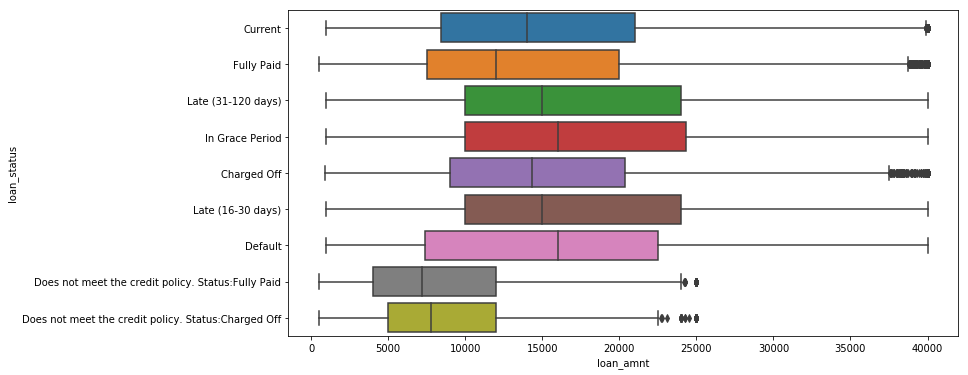

In [9]:
#Visualization of Target Variable with the Loan Amount

plt.figure(figsize=(12,6))
sns.boxplot(df['loan_amnt'],df['loan_status'])

We considered Fully Paid loans and Charged off, Late (31-120 days), Default loans as these categories tells surely about loan repayment

In [10]:
default=['Charged Off','Late (31-120 days)','Default']
df['loan_status']=df['loan_status'].apply(lambda x: 'Default' if x in default else x)

In [11]:
df['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Default                                                 283583
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Name: loan_status, dtype: int64

### Creating Target Variable Default and Fully paid

In [12]:
df=df[(df['loan_status']=='Default') | (df['loan_status']=='Fully Paid')]

In [13]:
df['loan_status'].value_counts()

Fully Paid    1041952
Default        283583
Name: loan_status, dtype: int64

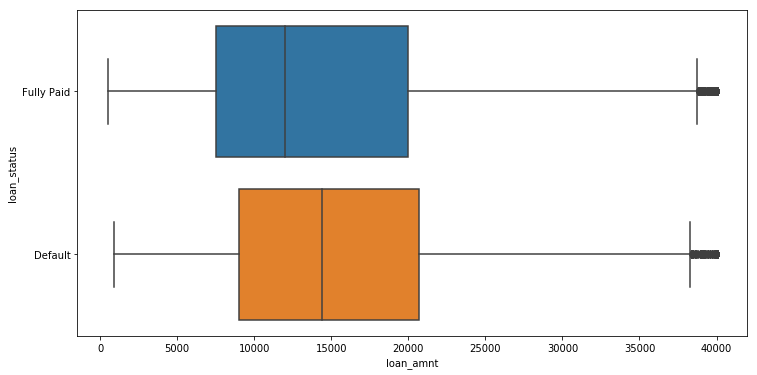

In [14]:
#Visualization of Target Variable which has only 2 categories:
#1. Fully Paid
#2. Defaulter

plt.figure(figsize=(12,6))
sns.boxplot(df['loan_amnt'],df['loan_status'])

In [15]:
#Finding the amount of missing values in the entire dataset

missing_val_count_by_column = (df.isnull().sum())
total_entries = len(df)*len(df.columns)
percent_missing_entries = sum(missing_val_count_by_column)/total_entries
percent_missing_columns = len(missing_val_count_by_column[missing_val_count_by_column > 0.5*len(df)])/len(df.columns)

print("Total missing entries:")
print(sum(missing_val_count_by_column),'\n')

print("Percentage of missing entries:")
print(percent_missing_entries*100, '\n')

print("Percentage of columns with more than 50 percent missing values:")
print(percent_missing_columns*100, '\n')

print("Number of columns with more than 50 percent missing values:")
print(len(missing_val_count_by_column[missing_val_count_by_column > 0.5*len(df)]))

Total missing entries:
69530059 

Percentage of missing entries:
36.175404517863505 

Percentage of columns with more than 50 percent missing values:
40.0 

Number of columns with more than 50 percent missing values:
58


In [16]:
print("Columns with more than 50 percent missing values:")
print(missing_val_count_by_column[missing_val_count_by_column > 0.5*len(df)])

Columns with more than 50 percent missing values:
id                                            1325535
member_id                                     1325535
url                                           1325535
desc                                          1202191
mths_since_last_delinq                         668041
mths_since_last_record                        1099727
next_pymnt_d                                  1303607
mths_since_last_major_derog                    976308
annual_inc_joint                              1300110
dti_joint                                     1300112
verification_status_joint                     1300277
open_acc_6m                                    805855
open_act_il                                    805854
open_il_12m                                    805854
open_il_24m                                    805854
mths_since_rcnt_il                             819596
total_bal_il                                   805854
il_util                         

In [17]:
#Checking different types of datatypes present in the dataset

df.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,int64,4
1,float64,105
2,object,36


Text(0, 0.5, 'Count')

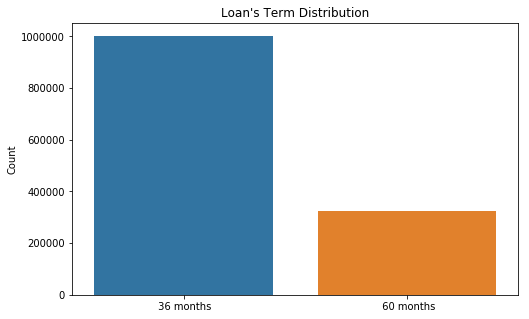

In [18]:
#Visualizing Loan term distribution count for 2 terms: 36 months and 60 months

plt.figure(figsize=(8, 5))
sns.barplot(y=df.term.value_counts(), x=df.term.value_counts().index)
plt.xticks(rotation=0)
plt.title("Loan's Term Distribution")
plt.ylabel("Count")

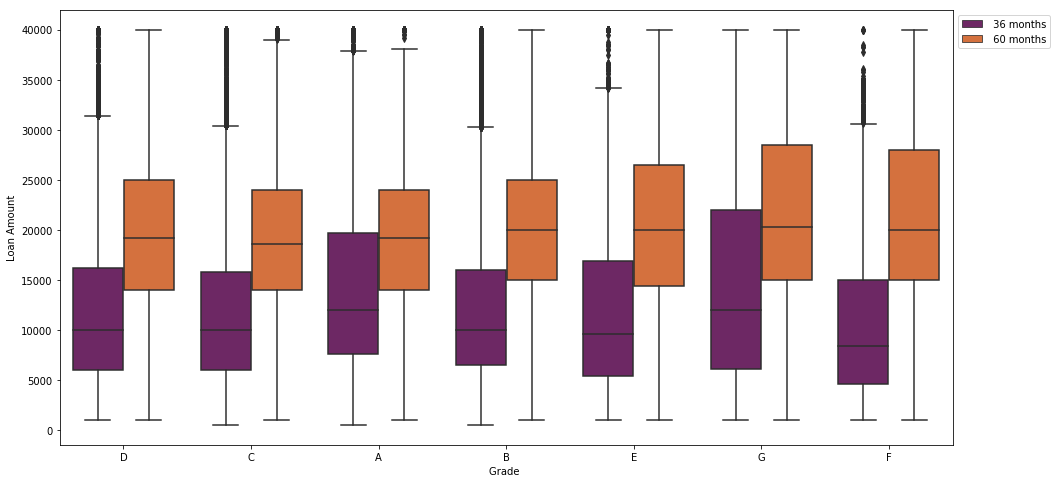

In [19]:
#Visualizing Loan term distribution count for 2 terms: 36 months and 60 months with respect to Grade and Loan Amount

plt.figure(figsize=(16,8))
sns.boxplot(x=df.grade, y=df.loan_amnt, hue=df.term, palette="inferno")
plt.xlabel("Grade ")
plt.ylabel("Loan Amount")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

In [20]:
#Plotting which employment type has taken the maximum amount of loans

trace0 = go.Bar(
    x = df.emp_title.value_counts()[:40].index.values,
    y = df.emp_title.value_counts()[:40].values,
    marker=dict(
        color=df.emp_title.value_counts()[:40].values
    ),
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Employment name'
    ),
    title='TOP 40 Employment Title'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='emp-title-bar')

In [21]:
df['issue_year']=df['issue_d'].apply(lambda x:int(x.split('-')[1]))

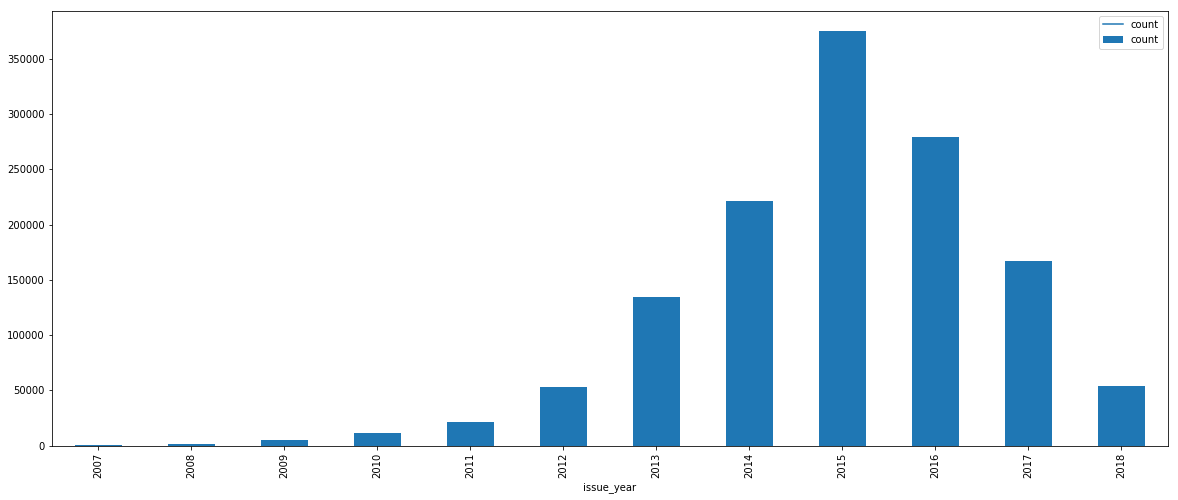

In [22]:
#Plotting the count of loan status with the year in which it has been issued

year_wise =df.groupby(by= [df.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

Text(0.5, 1.0, 'Interest Rate Vs. Grade')

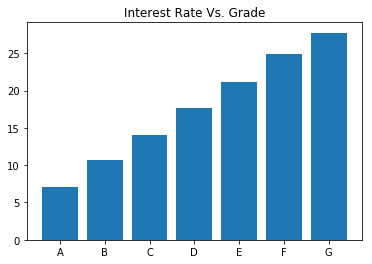

In [23]:
#Plotting the Interest Rate vs Grade distribution which tells us which Grade has the maximum Interest Rate

interest_by_grade=df[['int_rate','grade']].groupby('grade').mean()
plt.bar(x=interest_by_grade.index,height=interest_by_grade['int_rate'])
plt.title('Interest Rate Vs. Grade')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

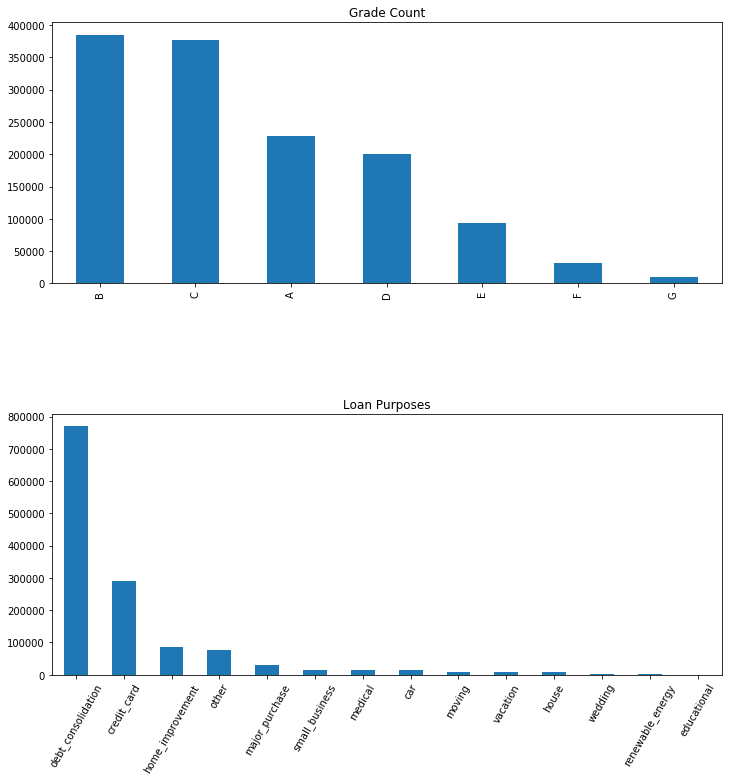

In [24]:
#Plotting two bar graphs
#1.Describes the count of people taking Loan in which Grade
#2.Describes the loan purposes with the count

fig, ax = plt.subplots(2, 1, figsize=(12, 12))
plt.subplots_adjust(wspace=1.0, hspace=0.50)
df.grade.value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title("Grade Count")
df.purpose.value_counts().plot(kind="bar", ax=ax[1])
ax[1].set_title("Loan Purposes")
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

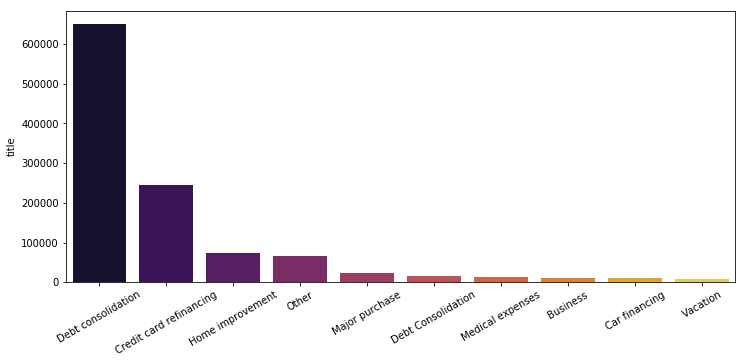

In [25]:
#Plotting the bar graph describing which loan purposes type has the maximum count

plt.figure(figsize=(12,5))
sns.barplot(x=df.title.value_counts()[:10].index, y=df.title.value_counts()[:10], data=df, palette='inferno')
plt.xticks(rotation=30)

In [26]:
def getMonth(x):
    return x.split('-')[0]

df['Month'] = df.issue_d.apply(getMonth)


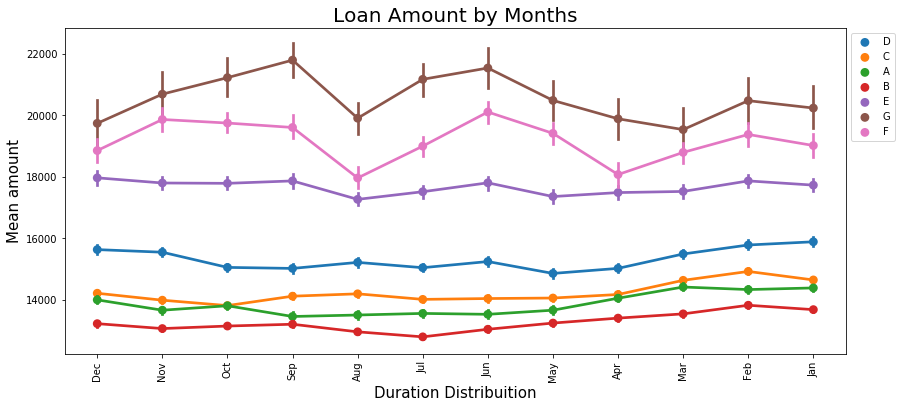

In [27]:
#Line graph to depict the loan distribution amount by months for every grade

plt.figure(figsize = (14,6))

g = sns.pointplot(x='Month', y='loan_amnt', 
              data=df, hue='grade')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.set_title("Loan Amount by Months", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.show()

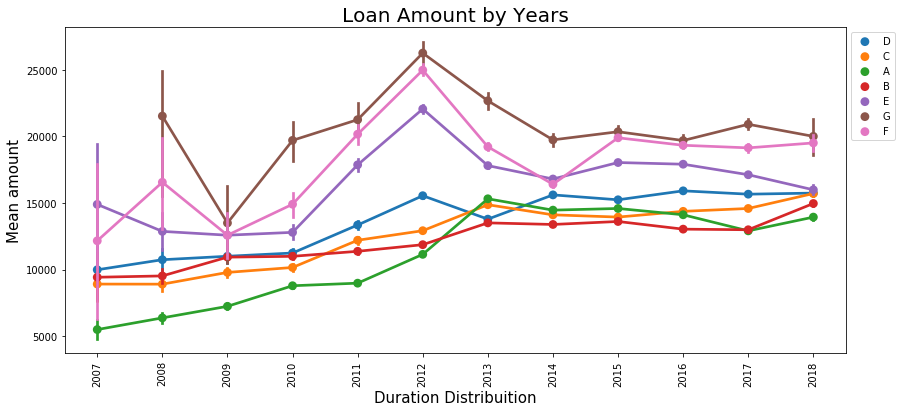

In [28]:
#Line graph to depict the loan distribution amount by years for every grade

plt.figure(figsize = (14,6))

g = sns.pointplot(x='issue_year', y='loan_amnt', 
              data=df, hue='grade')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.set_title("Loan Amount by Years", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.show()

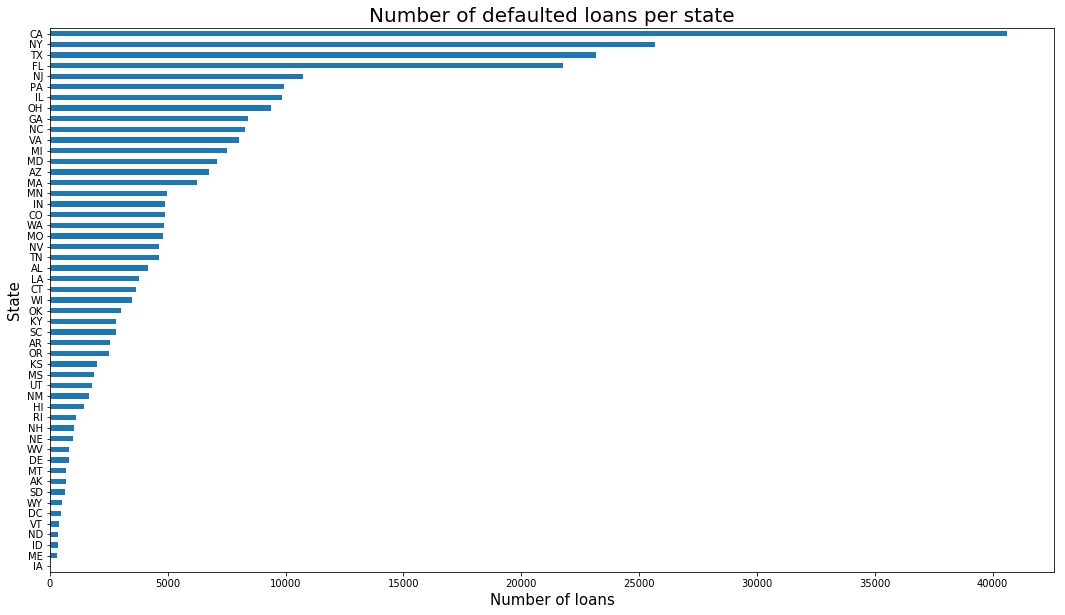

In [29]:
#Graph tells us number of loan defaulters in each state

fig = plt.figure(figsize=(18,10))
df[df['loan_status']=='Default'].groupby('addr_state')['loan_status'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

California, New York and Texas have the maximum number of loan defaulters

In [30]:
df.shape

(1325535, 147)

In [31]:
df['loan_status'].value_counts()

Fully Paid    1041952
Default        283583
Name: loan_status, dtype: int64

In [32]:
df['grade'].value_counts()

B    384916
C    377577
A    227559
D    200273
E     93800
F     32203
G      9207
Name: grade, dtype: int64

In [33]:
#0-Fully paid
#1-Default

In [34]:
df['loan_status'].value_counts()

Fully Paid    1041952
Default        283583
Name: loan_status, dtype: int64

In [35]:
df.shape

(1325535, 147)

### Data Cleaning

In [36]:
df.shape

(1325535, 147)

In [37]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year,Month
100,NaN,NaN,30000,30000,30000.0,36 months,22.35,1151.16,D,D5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,Dec
152,NaN,NaN,40000,40000,40000.0,60 months,16.14,975.71,C,C4,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,Dec
170,NaN,NaN,20000,20000,20000.0,36 months,7.56,622.68,A,A3,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,Dec
186,NaN,NaN,4500,4500,4500.0,36 months,11.31,147.99,B,B3,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,Dec
215,NaN,NaN,8425,8425,8425.0,36 months,27.27,345.18,E,E5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,Dec


In [38]:
#Finding the columns with missing values along with the datatype of each column

In [39]:
df_dtypes = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

In [40]:
df_dtypes.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
5,policy_code,0,int64
8,revol_bal,0,int64
24,loan_amnt,0,int64
25,funded_amnt,0,int64
41,issue_year,0,int64
...,...,...,...
142,sec_app_mths_since_last_major_derog,1318750,float64
143,orig_projected_additional_accrued_interest,1320632,float64
144,url,1325535,float64
145,member_id,1325535,float64


#### Dropping columns with more than 50% missing values

In [41]:
dropping_columns=[]

for i in range(len(df.columns)):
    if df.iloc[:,i].isnull().mean() > 0.5:
        dropping_columns.append(df.iloc[:,i].name)
df = df.drop(dropping_columns,axis=1)

In [42]:
df.shape

(1325535, 89)

In [43]:
def plot_feature(col_name, isContinuous):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)

    # Plot with loan status
    if isContinuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by Loan Status')
    else:
        data = df.groupby(col_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('Loan status')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

In [44]:
df.iloc[0:10:,0:10]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length
100,30000,30000,30000.0,36 months,22.35,1151.16,D,D5,Supervisor,5 years
152,40000,40000,40000.0,60 months,16.14,975.71,C,C4,Assistant to the Treasurer (Payroll),< 1 year
170,20000,20000,20000.0,36 months,7.56,622.68,A,A3,Teacher,10+ years
186,4500,4500,4500.0,36 months,11.31,147.99,B,B3,Accounts Examiner III,10+ years
215,8425,8425,8425.0,36 months,27.27,345.18,E,E5,Senior Director Risk Management,3 years
269,20000,20000,20000.0,60 months,17.97,507.55,D,D1,Front office Lead,4 years
271,6600,6600,6325.0,36 months,11.31,217.05,B,B3,Sewell collision center,10+ years
296,2500,2500,2475.0,36 months,13.56,84.92,C,C1,Manager,5 years
369,4000,4000,4000.0,36 months,17.97,144.55,D,D1,service advisor,5 years
379,2700,2700,2675.0,36 months,8.19,84.85,A,A4,Stylist,4 years


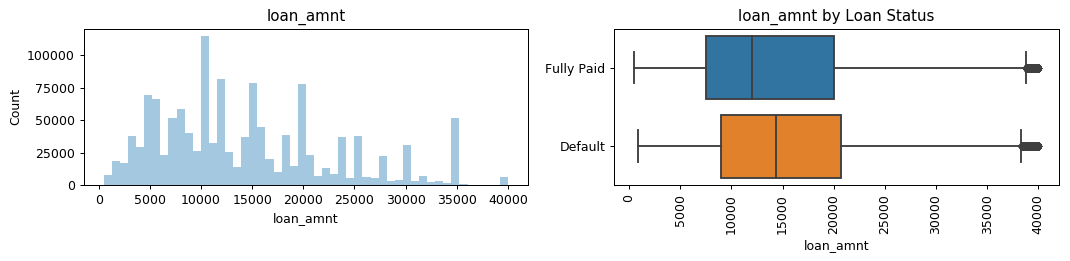

In [45]:
plot_feature('loan_amnt', True)

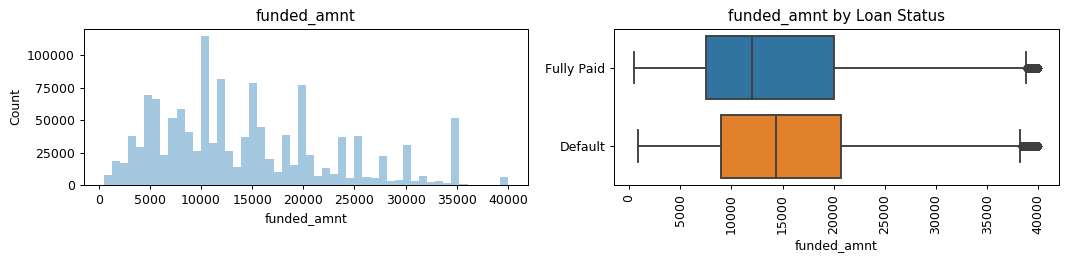

In [46]:
plot_feature('funded_amnt',True)

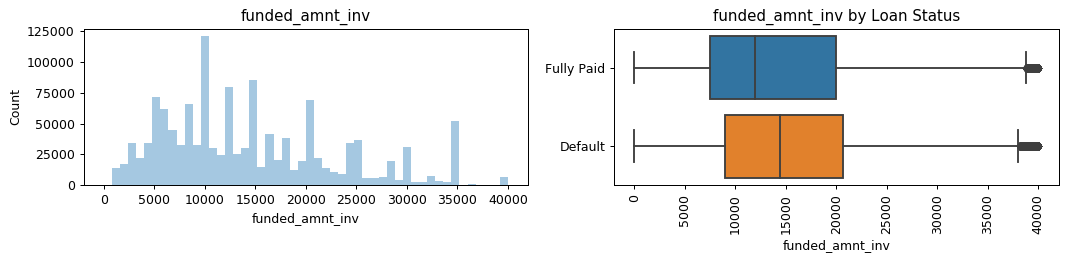

In [47]:
plot_feature('funded_amnt_inv',True)

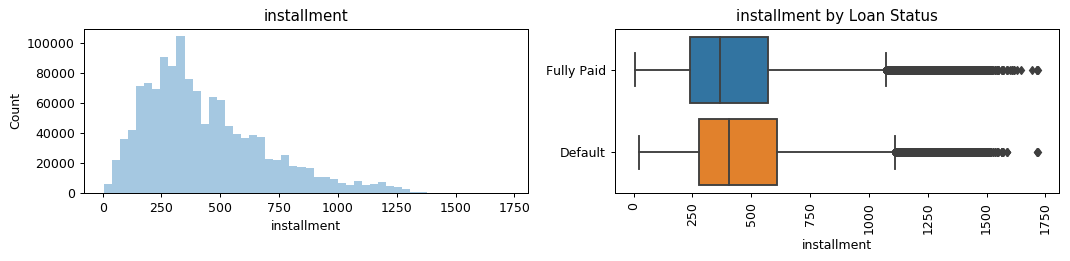

In [48]:
plot_feature('installment', True)

In [49]:
features_to_be_removed=[]

Funded_amnt, funded_amnt_inv and  loan_amnt has similar graph hence removing two features 

In [50]:
features_to_be_removed.extend(['funded_amnt','funded_amnt_inv'])

In [51]:
features_to_be_removed

['funded_amnt', 'funded_amnt_inv']

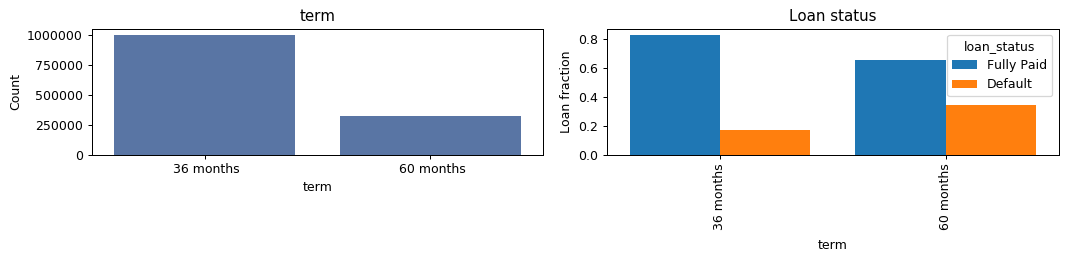

In [52]:
plot_feature('term',False)

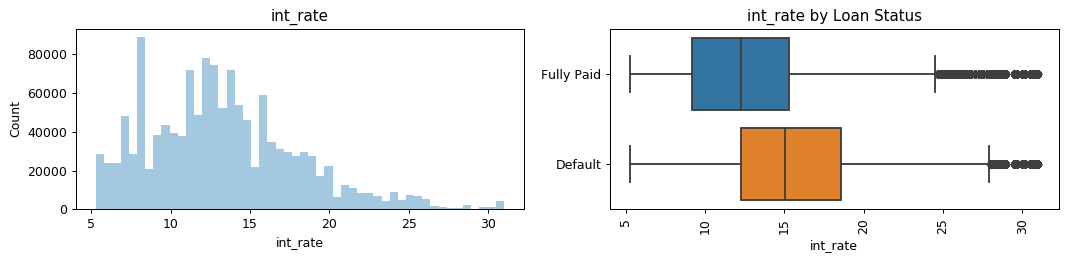

In [53]:
plot_feature('int_rate', True)

#### People who were defaulter had a very high interest rate

In [54]:
df['grade'].value_counts()

B    384916
C    377577
A    227559
D    200273
E     93800
F     32203
G      9207
Name: grade, dtype: int64

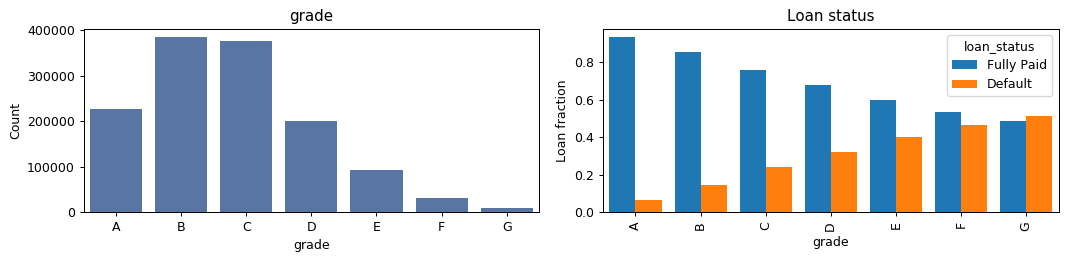

In [55]:
plot_feature('grade', False)

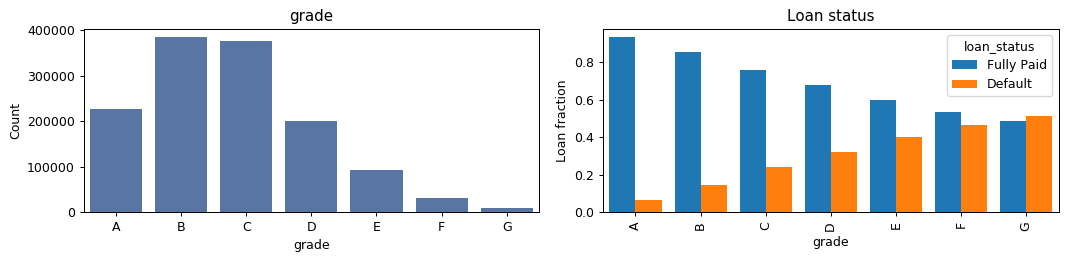

In [56]:
plot_feature('grade', False)

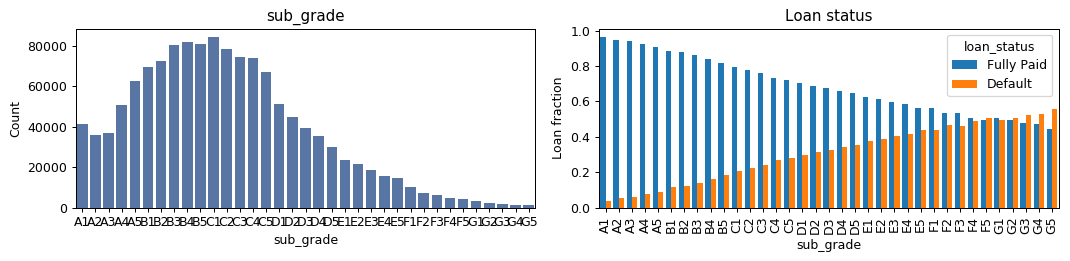

In [57]:
plot_feature('sub_grade', False)

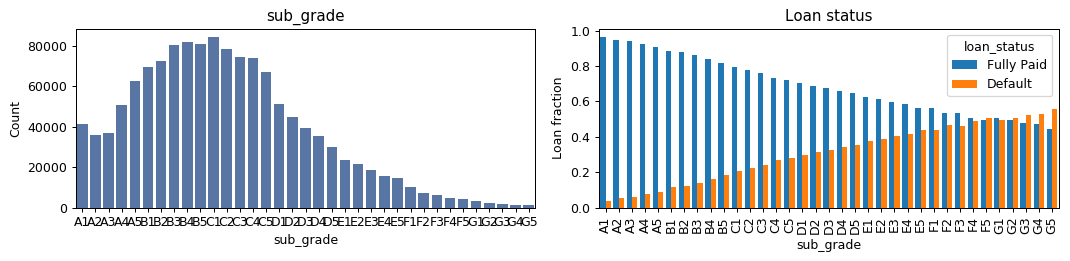

In [58]:
plot_feature('sub_grade', False)

Keeping only grade column

Removing emp_title columns

In [59]:
features_to_be_removed.extend(['emp_title','installment','sub_grade'])

In [60]:
features_to_be_removed

['funded_amnt', 'funded_amnt_inv', 'emp_title', 'installment', 'sub_grade']

In [61]:
df.emp_length.value_counts()

10+ years    435275
2 years      119830
< 1 year     106530
3 years      106021
1 year        87249
5 years       82985
4 years       79391
6 years       61856
8 years       59912
7 years       58915
9 years       50180
Name: emp_length, dtype: int64

In [62]:
df.emp_length.fillna(value=0,inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

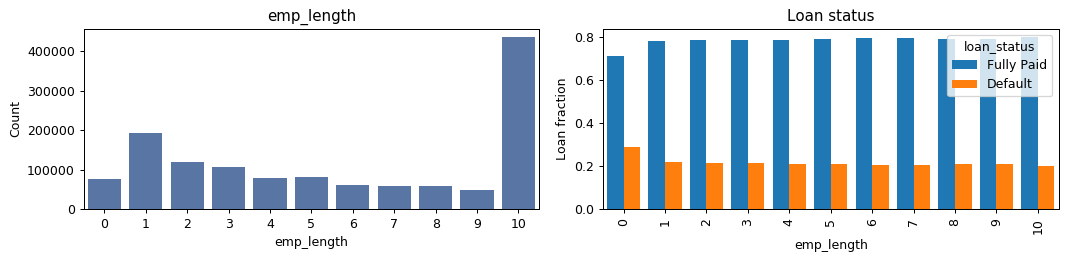

In [63]:
plot_feature('emp_length', False)

In [64]:
df['emp_length'].value_counts()

10    435275
1     193779
2     119830
3     106021
5      82985
4      79391
0      77391
6      61856
8      59912
7      58915
9      50180
Name: emp_length, dtype: int64

In [65]:
df.iloc[0:5:,10:20]

,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state
100,MORTGAGE,100000.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,917xx,CA
152,MORTGAGE,45000.0,Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,456xx,OH
170,MORTGAGE,100000.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,982xx,WA
186,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,786xx,TX
215,MORTGAGE,450000.0,Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,020xx,MA


In [66]:
df.home_ownership.value_counts()

MORTGAGE    654902
RENT        527576
OWN         142585
ANY            280
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

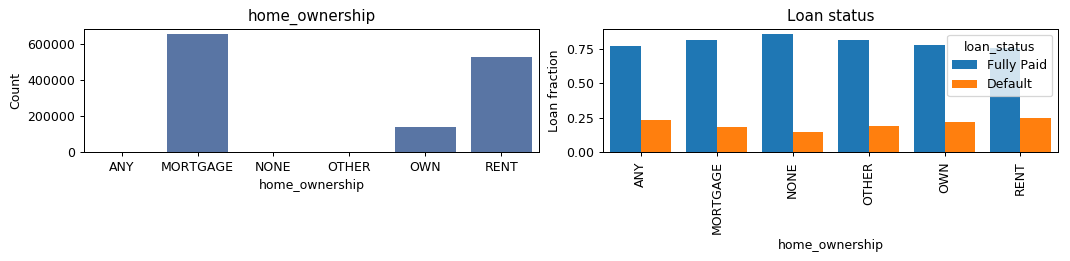

In [67]:
plot_feature('home_ownership', False)

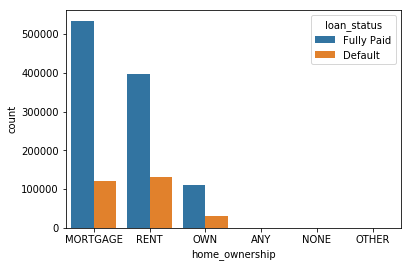

In [68]:
sns.countplot(x='home_ownership',hue='loan_status',data=df)

In [69]:
df['pymnt_plan'].value_counts()

n    1324870
y        665
Name: pymnt_plan, dtype: int64

Majority is n and we can remove this column


In [70]:
features_to_be_removed.extend(['pymnt_plan'])

In [71]:
features_to_be_removed

['funded_amnt',
 'funded_amnt_inv',
 'emp_title',
 'installment',
 'sub_grade',
 'pymnt_plan']

In [72]:
df['verification_status'].value_counts()

Source Verified    512947
Verified           414654
Not Verified       397934
Name: verification_status, dtype: int64

In [73]:
df.verification_status = df.verification_status.map(lambda x: 1 if x == 'Not Verified' else 0)

In [74]:
df['verification_status'].value_counts()

0    927601
1    397934
Name: verification_status, dtype: int64

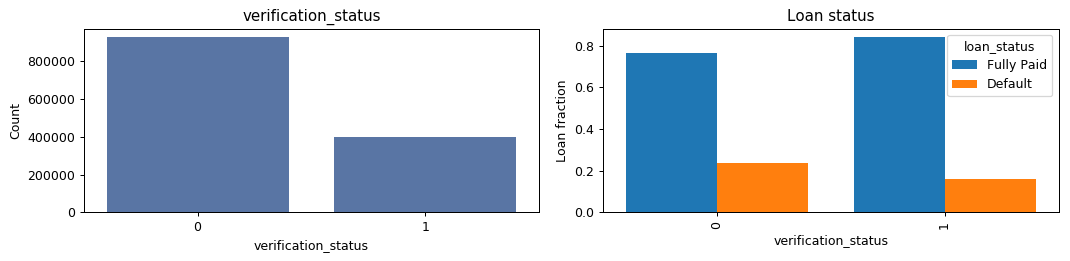

In [75]:
plot_feature('verification_status', False)


In [76]:
df['purpose'].value_counts()

debt_consolidation    770245
credit_card           289796
home_improvement       85946
other                  76611
major_purchase         28909
small_business         15365
medical                15342
car                    14330
moving                  9360
vacation                8907
house                   7178
wedding                 2294
renewable_energy         926
educational              326
Name: purpose, dtype: int64

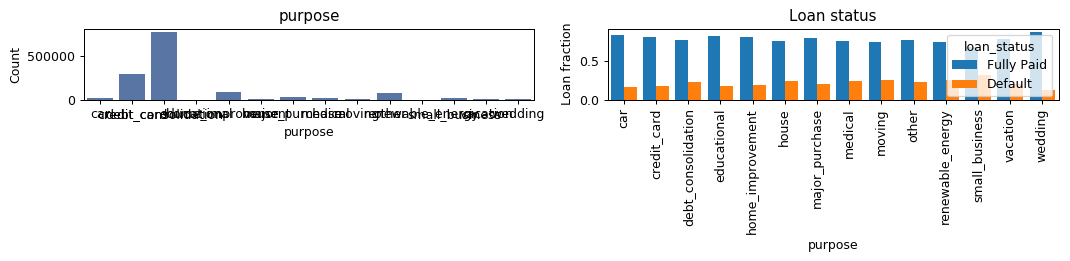

In [77]:
plot_feature('purpose',False)

In [78]:
df['title'].value_counts()

Debt consolidation                          651383
Credit card refinancing                     244697
Home improvement                             73566
Other                                        65543
Major purchase                               23548
                                             ...  
Simplifying life to focus more on school         1
Short term funds                                 1
Debit Loans                                      1
help to get out of debt                          1
Gift from God                                    1
Name: title, Length: 61680, dtype: int64

In [79]:
features_to_be_removed.extend(['title','zip_code'])

In [80]:
features_to_be_removed

['funded_amnt',
 'funded_amnt_inv',
 'emp_title',
 'installment',
 'sub_grade',
 'pymnt_plan',
 'title',
 'zip_code']

In [81]:
df['addr_state'].value_counts()

CA    193970
TX    108615
NY    108495
FL     94432
IL     50753
NJ     47658
PA     44852
OH     42993
GA     42707
VA     37475
NC     37204
MI     34708
AZ     32228
MD     30866
MA     30509
CO     29219
WA     28711
MN     23590
IN     21349
MO     20949
TN     20027
NV     19958
CT     19390
WI     17485
AL     16441
OR     16167
SC     15712
LA     15290
KY     12631
OK     12071
KS     11048
AR      9899
UT      9898
NM      7277
HI      6687
MS      6519
NH      6353
RI      5779
WV      4786
MT      3743
DE      3716
NE      3514
DC      3415
AK      3143
WY      2865
SD      2726
VT      2594
ME      1958
ID      1596
ND      1557
IA         7
Name: addr_state, dtype: int64

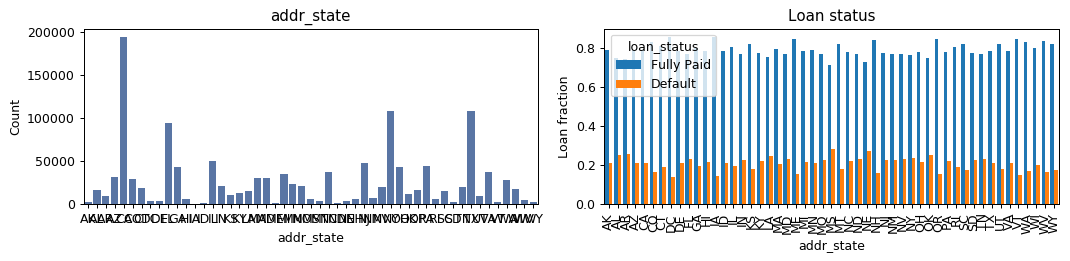

In [82]:
plot_feature('addr_state', False)

In [83]:
df['issue_month'] = pd.Series(df.issue_d).str.replace(r'-\d+', '')

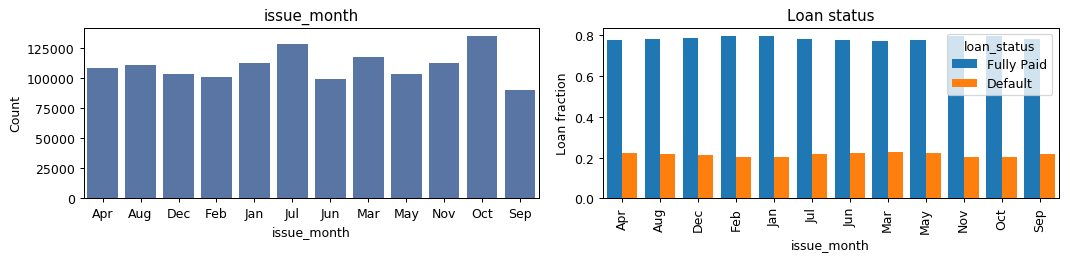

In [84]:
plot_feature('issue_month', False)

In [85]:
df['issue_year'] = pd.Series(df.issue_d).str.replace(r'\w+-', '').astype(np.int)

In [86]:
df.issue_year.value_counts()

2015    374988
2016    279698
2014    221820
2017    167375
2013    134801
2018     53700
2012     53367
2011     21721
2010     11536
2009      4716
2008      1562
2007       251
Name: issue_year, dtype: int64

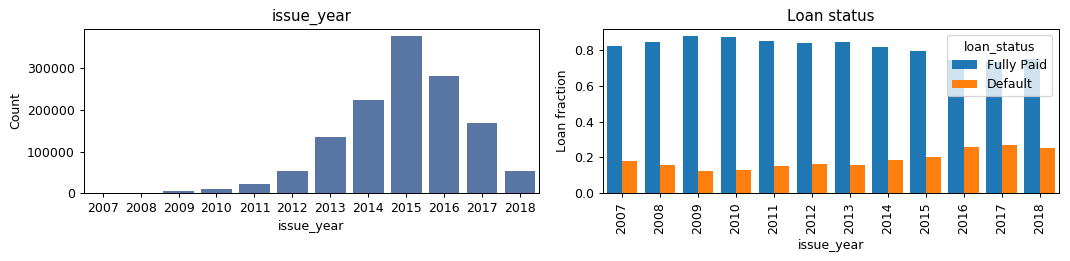

In [87]:
plot_feature('issue_year', False)

In [88]:
features_to_be_removed.extend(['issue_d'])

In [89]:
features_to_be_removed

['funded_amnt',
 'funded_amnt_inv',
 'emp_title',
 'installment',
 'sub_grade',
 'pymnt_plan',
 'title',
 'zip_code',
 'issue_d']

In [90]:
df.iloc[0:5:,20:30]

,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status
100,30.46,0.0,Jan-2012,0.0,11.0,1.0,15603,37.0,19.0,w
152,50.53,0.0,Jun-2009,0.0,18.0,0.0,34971,64.5,37.0,w
170,18.92,0.0,Feb-1999,0.0,9.0,0.0,25416,29.9,19.0,w
186,4.64,0.0,Dec-2003,0.0,12.0,0.0,4472,15.3,25.0,w
215,12.37,0.0,Oct-1997,0.0,21.0,0.0,36812,65.7,37.0,w


In [91]:
df['earliest_cr_year'] = df.earliest_cr_line.str.replace(r'\w+-', '').astype(np.int)

In [92]:
df['credit_history'] = np.absolute(df['issue_year']- df['earliest_cr_year'])

In [93]:
features_to_be_removed.extend(['earliest_cr_line',])

In [94]:
df.initial_list_status.value_counts()

w    768231
f    557304
Name: initial_list_status, dtype: int64

In [95]:
df.initial_list_status = df.initial_list_status.map(lambda x: 1 if x== 'w' else 0)

In [96]:
df.initial_list_status.value_counts()

1    768231
0    557304
Name: initial_list_status, dtype: int64

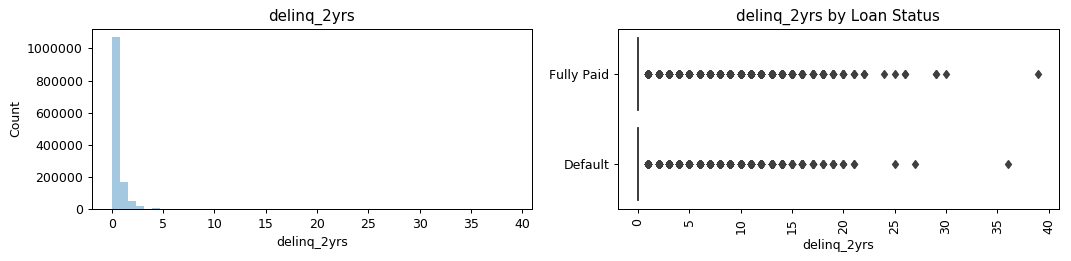

In [97]:
plot_feature('delinq_2yrs',True)

In [98]:
df['inq_last_6mths'].value_counts()

0.0    756814
1.0    362042
2.0    135611
3.0     51396
4.0     13787
5.0      4874
6.0       940
7.0        48
8.0        22
Name: inq_last_6mths, dtype: int64

In [99]:
df.iloc[0:5:,30:40]

,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d
100,0.0,0.0,30026.442500,30026.44,30000.0,26.44,0.0,0.0,0.0,Jan-2019
152,0.0,0.0,40856.678960,40856.68,40000.0,856.68,0.0,0.0,0.0,Feb-2019
170,0.0,0.0,20215.792430,20215.79,20000.0,215.79,0.0,0.0,0.0,Feb-2019
186,0.0,0.0,4549.217149,4549.22,4500.0,49.22,0.0,0.0,0.0,Feb-2019
215,0.0,0.0,8735.148975,8735.15,8425.0,310.15,0.0,0.0,0.0,Feb-2019


In [100]:
features_to_be_removed.extend(['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d'])

In [101]:
features_to_be_removed

['funded_amnt',
 'funded_amnt_inv',
 'emp_title',
 'installment',
 'sub_grade',
 'pymnt_plan',
 'title',
 'zip_code',
 'issue_d',
 'earliest_cr_line',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d']

In [102]:
df.iloc[0:5:,40:50]

,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths
100,30082.32,Jan-2019,0.0,1,Joint App,0.0,0.0,472330.0,42200.0,4.0
152,40910.48,Feb-2019,0.0,1,Joint App,0.0,0.0,271068.0,54200.0,5.0
170,20228.39,Feb-2019,0.0,1,Joint App,0.0,0.0,515779.0,85100.0,5.0
186,4553.46,Feb-2019,0.0,1,Individual,0.0,306.0,29137.0,29200.0,8.0
215,8754.30,Feb-2019,0.0,1,Joint App,0.0,0.0,690320.0,56000.0,10.0


In [103]:
df['application_type'].value_counts()

Individual    1300110
Joint App       25425
Name: application_type, dtype: int64

In [104]:
df['application_type'] = df.application_type.map(lambda x: 0 if x == 'Individual' else 1)

In [105]:
df['application_type'].value_counts()

0    1300110
1      25425
Name: application_type, dtype: int64

In [106]:
features_to_be_removed.extend(['last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med','policy_code','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'])

In [107]:
features_to_be_removed

['funded_amnt',
 'funded_amnt_inv',
 'emp_title',
 'installment',
 'sub_grade',
 'pymnt_plan',
 'title',
 'zip_code',
 'issue_d',
 'earliest_cr_line',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [108]:
df.iloc[0:5:,50:60]

,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc
100,42939.0,15181.0,46.9,0.0,0.0,83.0,73.0,23.0,2.0,1.0
152,15059.0,14930.0,67.3,0.0,0.0,114.0,70.0,2.0,2.0,1.0
170,57309.0,59684.0,29.9,0.0,0.0,171.0,238.0,1.0,1.0,5.0
186,2428.0,10735.0,28.9,0.0,0.0,180.0,69.0,2.0,2.0,0.0
215,34516.0,11632.0,74.6,0.0,0.0,254.0,89.0,12.0,12.0,4.0


In [109]:
features_to_be_removed.extend(['avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl'])

In [110]:
df.iloc[0:5:,60:70]

,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts
100,23.0,8.0,0.0,3.0,4.0,3.0,5.0,10.0,6.0,8.0
152,2.0,9.0,0.0,7.0,9.0,7.0,7.0,26.0,9.0,10.0
170,1.0,13.0,0.0,5.0,5.0,5.0,6.0,5.0,5.0,9.0
186,2.0,6.0,1.0,3.0,5.0,5.0,6.0,10.0,11.0,15.0
215,18.0,4.0,0.0,6.0,8.0,8.0,10.0,16.0,13.0,17.0


In [111]:
features_to_be_removed.extend(['mths_since_recent_bc','mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_bc_tl','num_il_tl','num_op_rev_tl'])

In [112]:
len(features_to_be_removed)

46

In [113]:
df.iloc[0:5:,70:80]

,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
100,4.0,11.0,0.0,0.0,0.0,2.0,89.5,33.3,1.0,0.0
152,9.0,18.0,0.0,0.0,0.0,4.0,100.0,42.9,0.0,0.0
170,5.0,9.0,0.0,0.0,0.0,1.0,94.7,20.0,0.0,0.0
186,5.0,12.0,0.0,0.0,0.0,4.0,91.7,0.0,0.0,0.0
215,8.0,21.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0


In [114]:
features_to_be_removed.extend(['num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','tax_liens'])

In [115]:
df.iloc[0:5:,80:90]

,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_year,Month,issue_month
100,527120.0,98453.0,28600.0,101984.0,N,Cash,N,2018,Dec,Dec
152,344802.0,161720.0,45700.0,167965.0,N,Cash,N,2018,Dec,Dec
170,622183.0,71569.0,85100.0,74833.0,N,Cash,N,2018,Dec,Dec
186,53795.0,29137.0,15100.0,24595.0,N,Cash,N,2018,Dec,Dec
215,768304.0,189194.0,45800.0,189054.0,N,Cash,N,2018,Dec,Dec


In [116]:
features_to_be_removed.extend(['tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','hardship_flag','disbursement_method','debt_settlement_flag','Month'])

In [117]:
len(features_to_be_removed)

64

In [118]:
df_selected = df.drop(list(set(features_to_be_removed)), axis = 1)

In [119]:
df_selected.shape

(1325535, 29)

In [120]:
df_selected.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
addr_state                  0
dti                       340
delinq_2yrs                 0
inq_last_6mths              1
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                841
total_acc                   0
initial_list_status         0
total_rec_int               0
application_type            0
acc_open_past_24mths    47281
mort_acc                47281
num_rev_accts           67528
issue_year                  0
issue_month                 0
earliest_cr_year            0
credit_history              0
dtype: int64

Imputing the null values by mean

In [121]:
df_selected['dti'].fillna((df_selected['dti'].mean()), inplace=True)
df_selected['inq_last_6mths'].fillna((df_selected['inq_last_6mths'].mean()), inplace=True)
df_selected['revol_util'].fillna((df_selected['revol_util'].mean()), inplace=True)
df_selected['acc_open_past_24mths'].fillna((df_selected['acc_open_past_24mths'].mean()), inplace=True)
df_selected['mort_acc'].fillna((df_selected['mort_acc'].mean()), inplace=True)
df_selected['num_rev_accts'].fillna((df_selected['num_rev_accts'].mean()), inplace=True)

In [122]:
df_selected.to_csv('./df_selected_columns.csv', index = False)


In [123]:
df_selected.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
total_rec_int           0
application_type        0
acc_open_past_24mths    0
mort_acc                0
num_rev_accts           0
issue_year              0
issue_month             0
earliest_cr_year        0
credit_history          0
dtype: int64

In [124]:
df_selected.shape


(1325535, 29)

### After data cleaning we are left with 29 columns and 1325535 rows